In [6]:
import cv2
import matplotlib.pyplot as plt  
import numpy as np 

In [16]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img
    
    
    

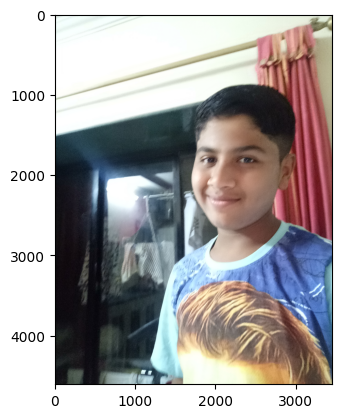

In [20]:
filename='My.jpg'
img=read_file(filename)

Creating Edge Mask


In [24]:
def edge_mask(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # median blurring preserves the edges and removes the noise in the image
    #AdaptiveThreshold requires gray scale image only
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

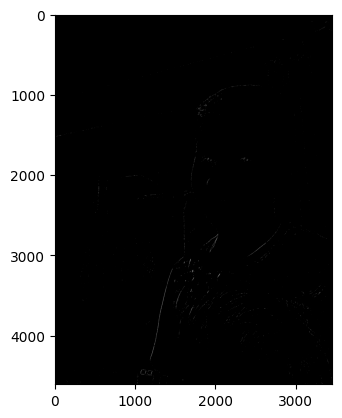

In [31]:
#line_size increases or reduces the thickness of the edges  and cmap in 'imshow' makes the overall color of the image to any color
line_size,blur_value=5,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap='binary')
plt.show()


#Reduce the color Pallette

In [35]:
#Only showing the prominent colors
#this is the k-means clustering algorithm for color quantizaation 
def color_quantization(img,k):
    #Transform the image
    data=np.float32(img).reshape((-1,3))  #changing the dtype of the image
    #Determine the criteria
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    #Implementing the k-means
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

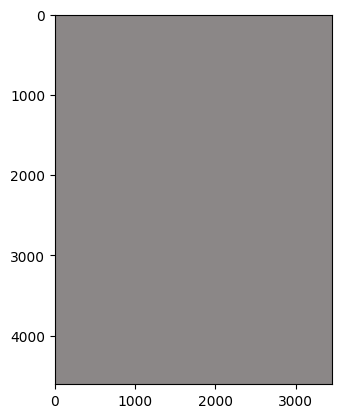

In [36]:
img=color_quantization(img,k=1)
plt.imshow(img)
plt.show()

In [1]:
#reducing the noise
import cv2
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

NameError: name 'cv2' is not defined